In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Data Cleaning

In [29]:
df = pd.read_csv('bank_marketing_analysis.csv')
df.head()

C:\Users\keert\AppData\Local\Temp\ipykernel_12972\2032019948.py:1: DtypeWarning: Columns (0,1,2,3,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bank_marketing_analysis.csv')


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,no
0,customer id and age.,ageeee,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76,1,-1,0,unknown,no


### (i)Fixing Rows and Columns

In [30]:
# skipping unwanted rows
df = pd.read_csv("bank_marketing_analysis.csv",skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261.0,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151.0,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76.0,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92.0,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198.0,1,-1,0,unknown,no


In [31]:
# Information about my DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45211 non-null  int64  
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  float64
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45211 non-null  object 
dtypes: float64(1), int64(8), 

In [32]:
# Dropping customerid that is not required further use
df.drop("customerid",axis=1,inplace=True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261.0,1,-1,0,unknown,no
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151.0,1,-1,0,unknown,no
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76.0,1,-1,0,unknown,no
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92.0,1,-1,0,unknown,no
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198.0,1,-1,0,unknown,no


In [33]:
# Dividing job from jobedu because it contains both job and education
df['job']= df.jobedu.apply(lambda x: x.split(",")[0])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261.0,1,-1,0,unknown,no,management
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151.0,1,-1,0,unknown,no,technician
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76.0,1,-1,0,unknown,no,entrepreneur
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92.0,1,-1,0,unknown,no,blue-collar
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198.0,1,-1,0,unknown,no,unknown


In [34]:
# Dividing education from jobedu
df['education']= df.jobedu.apply(lambda x: x.split(",")[1])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261.0,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151.0,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76.0,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92.0,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198.0,1,-1,0,unknown,no,unknown,unknown


In [35]:
# We have divided jobedu into 2 parts job and education, now then just drop jobedu which is not used in further process
df.drop("jobedu",axis=1, inplace=True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261.0,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151.0,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76.0,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92.0,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198.0,1,-1,0,unknown,no,unknown,unknown


In [36]:
# To check null values
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
dtype: int64

### In age we found 20 null values and in months we found 50 null values
### We have to remove null values from both

### (ii)Impute/Remove missing values

In [37]:
# Count the missing values in age column.
df.age.isnull().sum()

0

In [38]:
# Shape of DataFrame
df.shape

(45211, 19)

In [39]:
# Calculate the percentage of missing values in age column.
float(100.0*20/45211)

0.04423702196368141

### Drop the records with age missing

In [40]:
#drop the records with age missing in df and copy in df1 dataframe.
df1= df[-df.age.isnull()].copy()
df1.shape

(45211, 19)

### handling missing values in month column

In [41]:
# Count the missing values in month column in df1
df1.month.isnull().sum()

50

In [42]:
# Print the percentage of each month in the data frame df1
df1.month.value_counts(normalize=True)

month
may, 2017    0.304400
jul, 2017    0.152521
aug, 2017    0.138172
jun, 2017    0.118133
nov, 2017    0.087863
apr, 2017    0.064901
feb, 2017    0.058590
jan, 2017    0.031044
oct, 2017    0.016342
sep, 2017    0.012754
mar, 2017    0.010540
dec, 2017    0.004739
Name: proportion, dtype: float64

In [43]:
# Find the mode of month in df1
month_mode = df1.month.mode()[0]
month_mode

'may, 2017'

In [44]:
# Fill the missing values with mode value of month in df1
df1.month.fillna(month_mode, inplace=True)
df1.month.value_counts(normalize=True)

month
may, 2017    0.305169
jul, 2017    0.152352
aug, 2017    0.138020
jun, 2017    0.118002
nov, 2017    0.087766
apr, 2017    0.064829
feb, 2017    0.058526
jan, 2017    0.031010
oct, 2017    0.016323
sep, 2017    0.012740
mar, 2017    0.010528
dec, 2017    0.004733
Name: proportion, dtype: float64

In [45]:
# Let's see the null values in the month column
df1.month.isnull().sum()

0

In [46]:
# Dimensions of DataFrame
df1.ndim

2

In [48]:
numeric_data = df.select_dtypes(include=[np.number])

In [49]:
# To find Central location of data from df1
numeric_data.mean()

age            40.930813
salary      57006.171065
balance      1362.272058
day            15.806419
duration       83.275253
campaign        2.763841
pdays          40.197828
previous        0.580323
dtype: float64

In [51]:
# To find median value of a data set
numeric_data.median()

age            39.0
salary      60000.0
balance       448.0
day            16.0
duration        5.0
campaign        2.0
pdays          -1.0
previous        0.0
dtype: float64

In [52]:
# To find values that appears most often
df1.mode()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,32,20000,0,married,yes,no,yes,no,cellular,20,"may, 2017",1.5,1,-1,0,unknown,no,blue-collar,secondary


In [54]:
# Standard deviation
numeric_data.std()

age            10.619339
salary      32085.718415
balance      3044.765829
day             8.322476
duration      184.625500
campaign        3.098021
pdays         100.128746
previous        2.303441
dtype: float64

In [55]:
# Variance
numeric_data.var()

age         1.127704e+02
salary      1.029493e+09
balance     9.270599e+06
day         6.926361e+01
duration    3.408658e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [57]:
# Correlation
corr = numeric_data.corr()
corr

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024356,0.097776,-0.009196,-0.034151,0.004852,-0.023930,0.001177
salary,0.024356,1.000000,0.055469,0.027864,-0.061358,0.015005,-0.014968,0.014564
balance,0.097776,0.055469,1.000000,0.004503,-0.023586,-0.014578,0.003435,0.016674
day,-0.009196,0.027864,0.004503,1.000000,-0.065567,0.162490,-0.093044,-0.051710
duration,-0.034151,-0.061358,-0.023586,-0.065567,1.000000,-0.034613,-0.176035,-0.107739
campaign,0.004852,0.015005,-0.014578,0.162490,-0.034613,1.000000,-0.088628,-0.032855
pdays,-0.023930,-0.014968,0.003435,-0.093044,-0.176035,-0.088628,1.000000,0.454820
previous,0.001177,0.014564,0.016674,-0.051710,-0.107739,-0.032855,0.454820,1.000000


### To calculate the correlation between the numeric variables we can use heatmap to find correlation among them

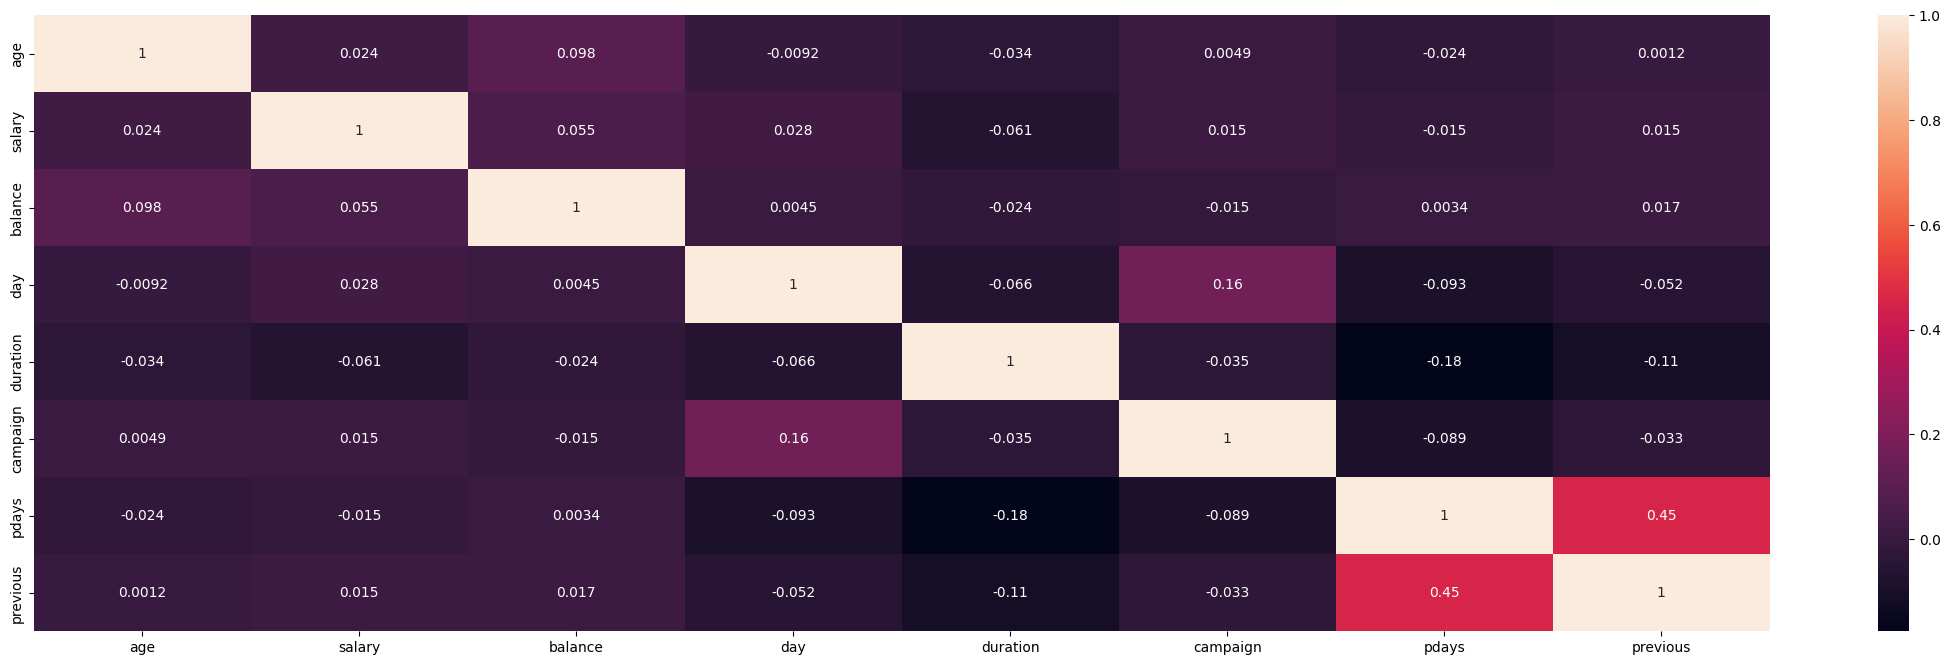

In [58]:
plt.subplots(figsize=(28,8))
corr = numeric_data.corr()
sns.heatmap(corr,annot=True,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values);
plt.show()

In [60]:
# The skew () method calculates the skew for each column
# The skew () method searches column-wise and returns the skew of each row
numeric_data.skew()

age          0.685555
salary       0.137829
balance      8.360308
day          0.093079
duration     4.567931
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [61]:
# describe() is used to calculate some statistical data like percentile,mean,standard deviation,count.
numeric_data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.930813,57006.171065,1362.272058,15.806419,83.275253,2.763841,40.197828,0.580323
std,10.619339,32085.718415,3044.765829,8.322476,184.625500,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,2.233333,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,5.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,91.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,3881.000000,63.000000,871.000000,275.000000


In [62]:
# Describe the pdays column of df1
numeric_data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### -1 indicates the missing values. Missing value does not always be present as null. How to handle it:

#### Objective is:

#### you should ignore the missing values in the calculations
#### simply make it missing - replace -1 with NaN.
#### all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [63]:
# describe the pdays column with considering the -1 values
df1.loc[df1.pdays<0,"pdays"] = np.NaN
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [64]:
0# describe the age variable in df1
df1.age.describe()

count    45211.000000
mean        40.930813
std         10.619339
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

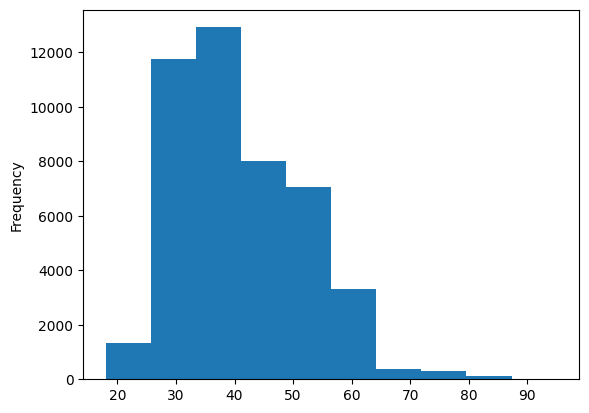

In [65]:
# hist () function in matplotlib helps the users to create histograms,reads the array of a numpy and sends it as an argument to the function
df1.age.plot.hist()
plt.show()

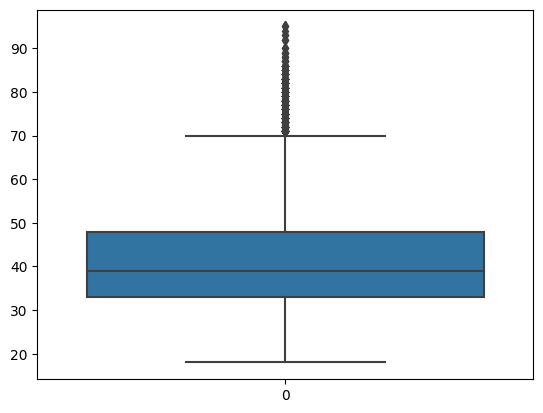

In [66]:
# Plot the boxplot of age variable
# To find summary of the set of data values
sns.boxplot(df1.age)
plt.show()

### From above boxplot we ploted outlayers, above the age group of 70.

In [67]:
# describe the salary variable of df1
df1.salary.describe()

count     45211.000000
mean      57006.171065
std       32085.718415
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

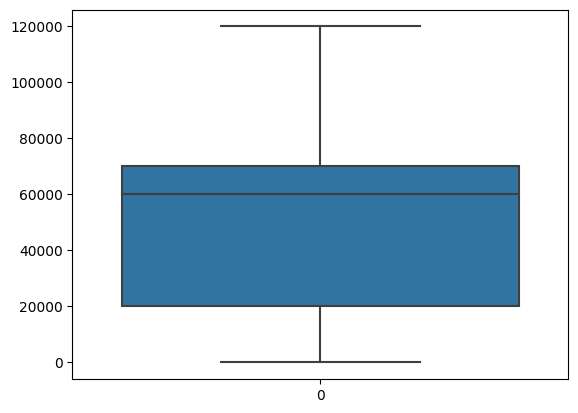

In [68]:
# plot the boxplot of salary variable
sns.boxplot(df1.salary)
plt.show()

In [69]:
# describe the balance variable of df1
df1.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

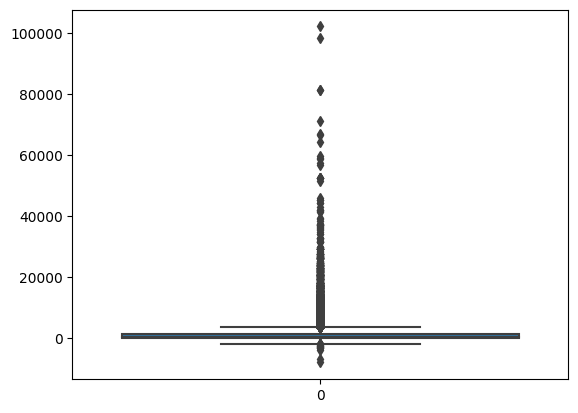

In [70]:
# plot the boxplot of balance variable
sns.boxplot(df1.balance)
plt.show()

## 2.Univariate Analysis

In [71]:
# Calculate the percentage of each marital status category
df1.marital.value_counts(normalize=True)

marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64

### Just plot in a bar graph for better understanding

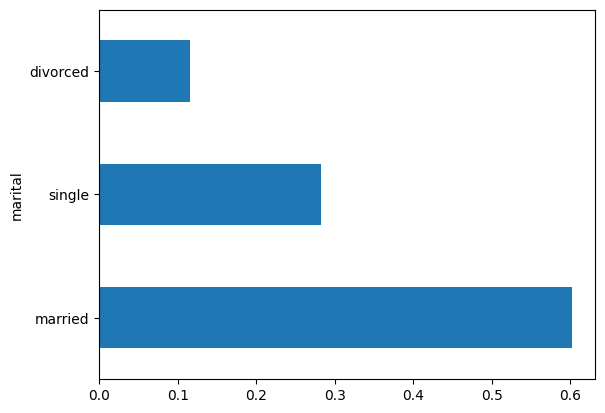

In [72]:
# plot the bar graph of percentage marital status categories
df1.marital.value_counts(normalize=True).plot.barh()
plt.show()

In [73]:
# Calculate the percentage of each job status categor
df1.job.value_counts(normalize=True)

job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: proportion, dtype: float64

### Just plot in a bar graph for better understanding

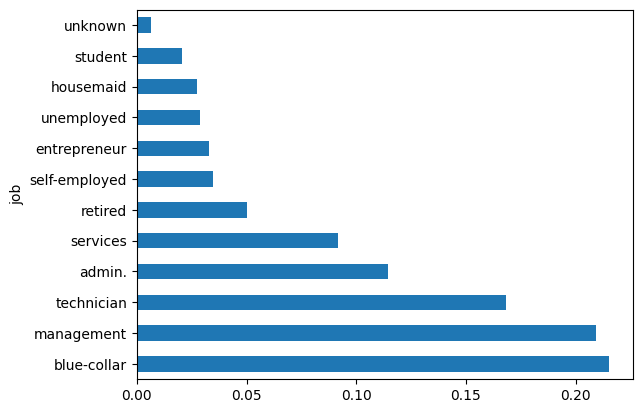

In [74]:
# Plot the bar graph of percentage job categories
df1.job.value_counts(normalize=True).plot.barh()
plt.show()

In [75]:
#calculate the percentage of each education category.
df1.education.value_counts(normalize=True)

education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64

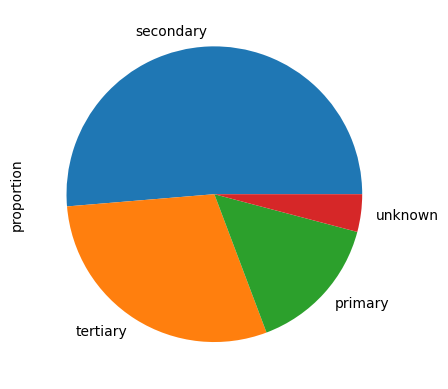

In [76]:
#plot the pie chart of education categories
df1.education.value_counts(normalize=True).plot.pie()
plt.show()

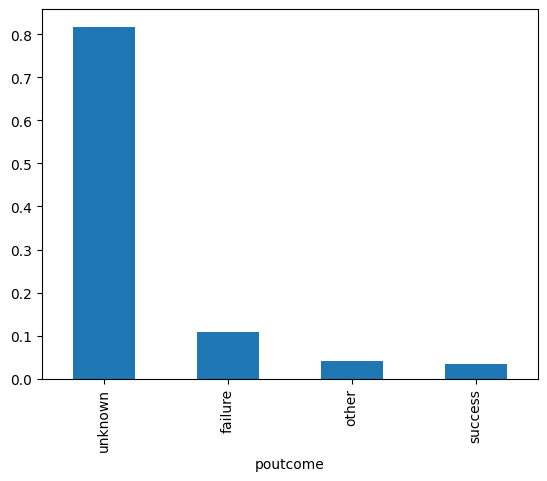

In [77]:
#calculate the percentage of each poutcome category.
df1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

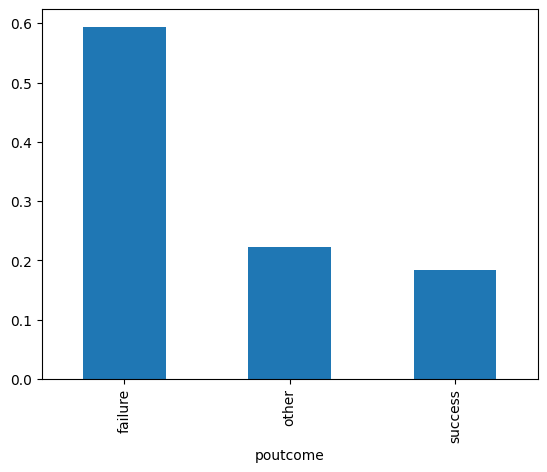

In [78]:
df1[-(df1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

In [79]:
#calculate the percentage of each response category.
df1.response.value_counts(normalize=True)

response
no     0.883059
yes    0.116941
Name: proportion, dtype: float64

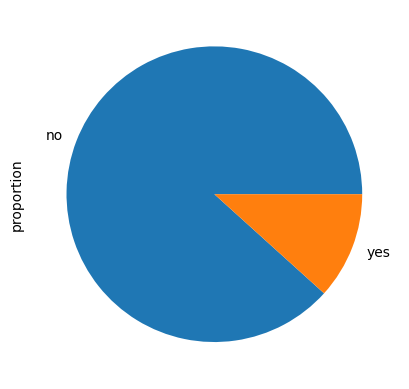

In [80]:
#plot the pie chart of response categories
df1.response.value_counts(normalize=True).plot.pie()
plt.show()

## 3.Bivariate Analysis

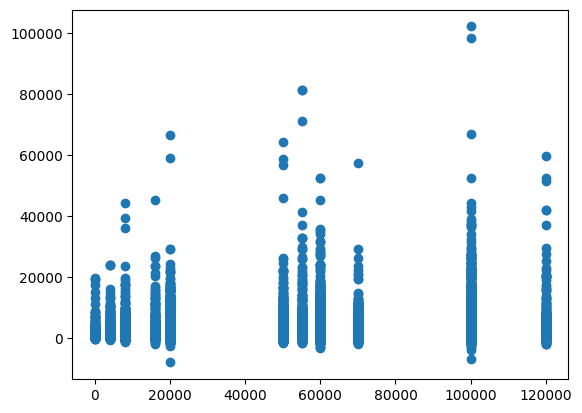

In [81]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(df1.salary, df1.balance)
plt.show()

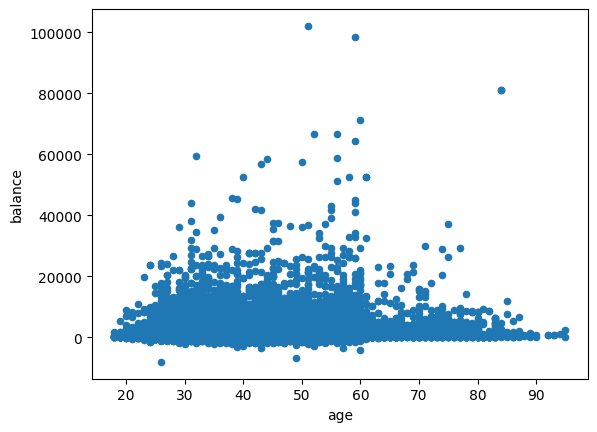

In [82]:
#plot the scatter plot of balance and age variable in inp1
df1.plot.scatter(x="age", y="balance")
plt.show()

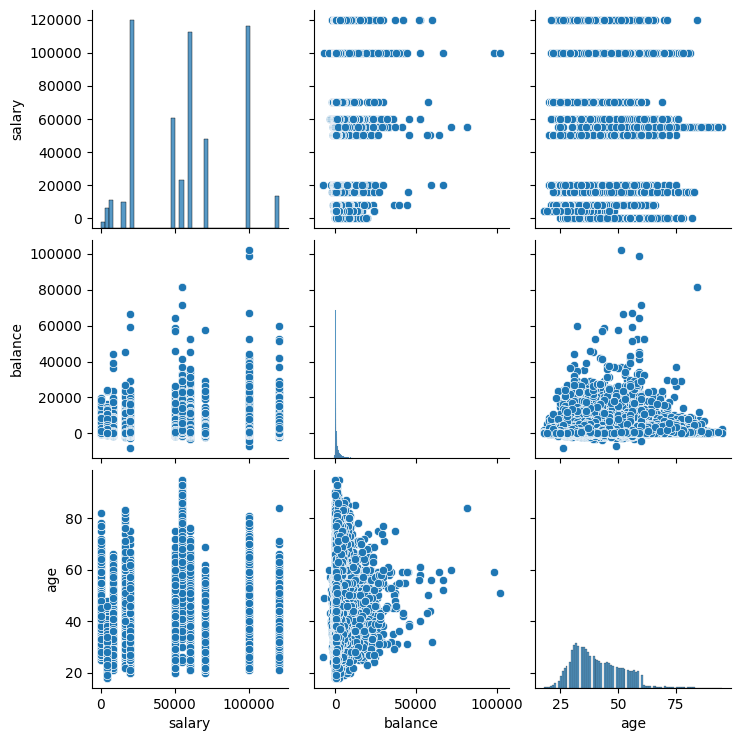

In [83]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=df1,vars=["salary","balance","age"])
plt.show()

In [84]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
df1[["age","salary","balance"]].corr()

,age,salary,balance
age,1.000000,0.024356,0.097776
salary,0.024356,1.000000,0.055469
balance,0.097776,0.055469,1.000000


<Axes: >

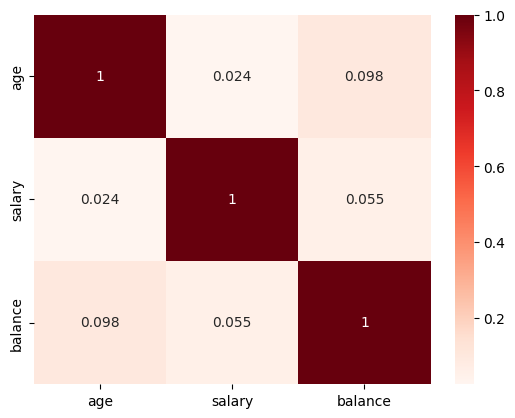

In [85]:
sns.heatmap(df1[["age","salary","balance"]].corr(),annot=True,cmap="Reds")

In [86]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
df1.groupby("response")["salary"].mean()

response
no     56772.367498
yes    58771.704180
Name: salary, dtype: float64

In [87]:
#groupby the response to find the median of the salary with response no & yes seperatly.
df1.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<Axes: xlabel='response', ylabel='salary'>

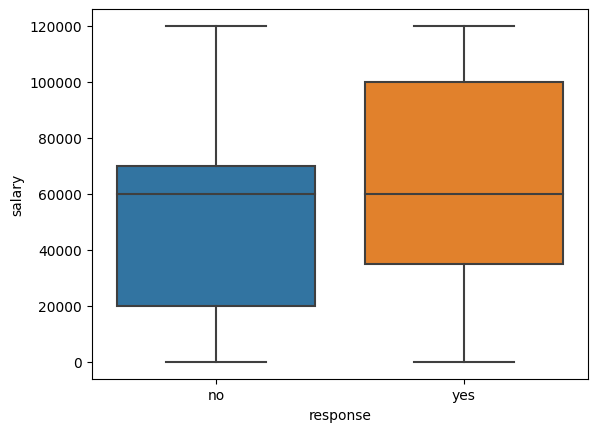

In [88]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=df1,x="response",y="salary")

<Axes: xlabel='response', ylabel='balance'>

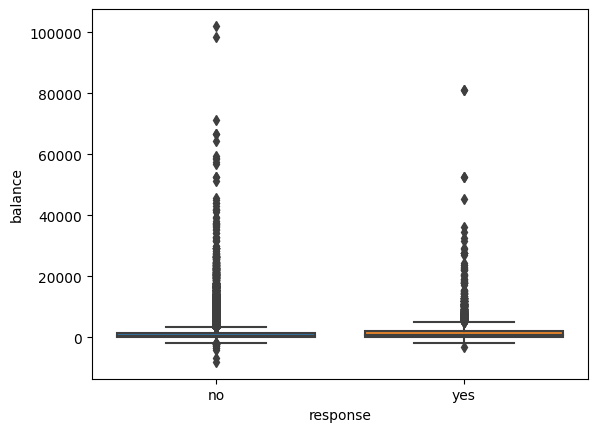

In [89]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=df1,x="response",y="balance")

In [90]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
df1.groupby("response")["balance"].mean()

response
no     1303.665339
yes    1804.832041
Name: balance, dtype: float64

In [91]:
#groupby the response to find the median of the balance with response no & yes seperatly.
df1.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [92]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [93]:
#calculate the mean, median and 75th percentile of balance with response
df1.groupby("response")["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1303.665339,417.0,1345.0
yes,1804.832041,733.0,2159.5


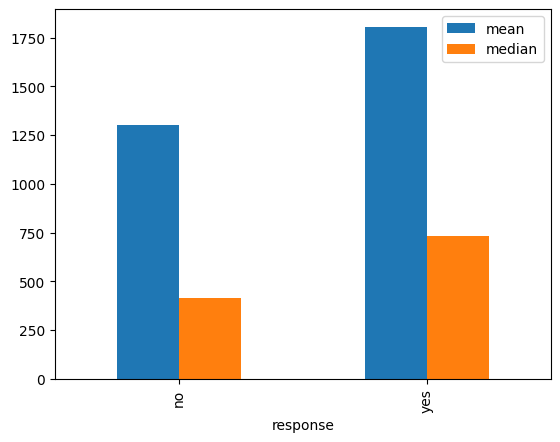

In [94]:
#plot the bar graph of balance's mean an median with response.
df1.groupby("response")["balance"].aggregate(["mean","median"]).plot.bar()
plt.show()

In [95]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
df1["response_flag"]=np.where(df1.response=="yes",1,0)

In [96]:
df1.response_flag.value_counts()

response_flag
0    39924
1     5287
Name: count, dtype: int64

In [97]:
df1.response.value_counts()

response
no     39924
yes     5287
Name: count, dtype: int64

In [98]:
df1.response.value_counts(normalize=True)

response
no     0.883059
yes    0.116941
Name: proportion, dtype: float64

In [99]:
df1.response_flag.value_counts(normalize=True)

response_flag
0    0.883059
1    0.116941
Name: proportion, dtype: float64

In [100]:
#calculate the mean of response_flag with different education categories.
df1.groupby(["education"])["response_flag"].mean()

education
primary      0.086265
secondary    0.105551
tertiary     0.149989
unknown      0.135703
Name: response_flag, dtype: float64

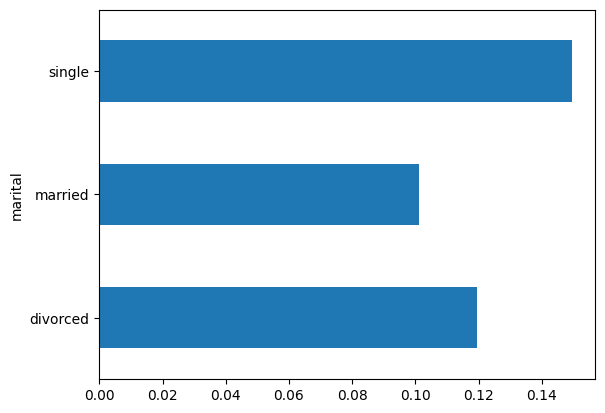

In [101]:
#plot the bar graph of marital status with average value of response_flag
df1.groupby(["marital"])["response_flag"].mean().plot.barh()
plt.show()

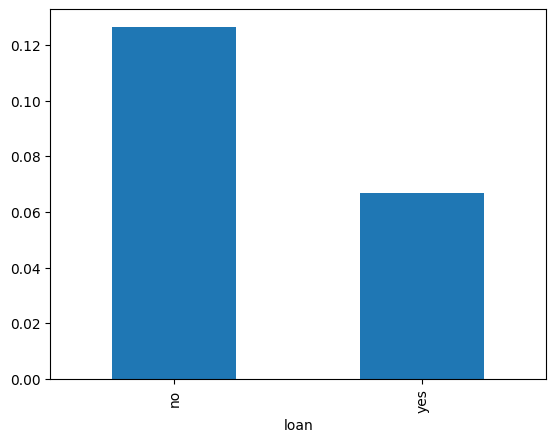

In [102]:
#plot the bar graph of personal loan status with average value of response_flag
df1.groupby(["loan"])["response_flag"].mean().plot.bar()
plt.show()

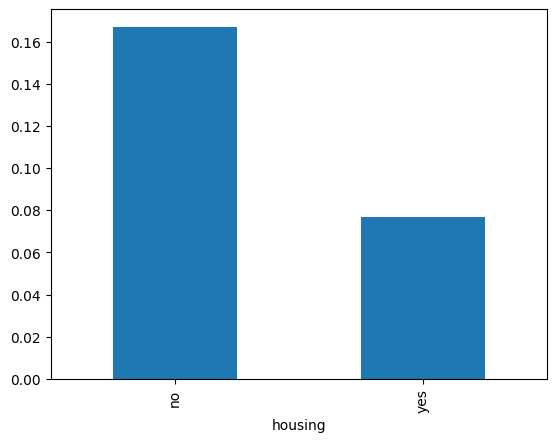

In [103]:
#plot the bar graph of housing loan status with average value of response_flag
df1.groupby(["housing"])["response_flag"].mean().plot.bar()
plt.show()

<Axes: xlabel='response', ylabel='age'>

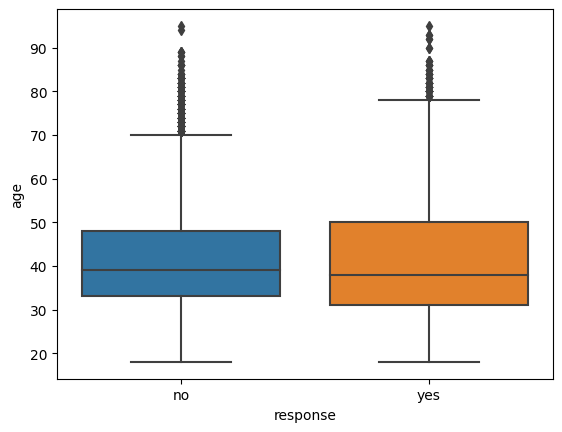

In [104]:
#plot the boxplot of age with response_flag
sns.boxplot(data=df1,x="response",y="age")

In [105]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
df1["age_group"]=pd.cut(df1.age[:5],[0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])

In [106]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
df1.age_group.value_counts(normalize=True)

age_group
30-40    0.4
40-50    0.4
50-60    0.2
<30      0.0
60+      0.0
Name: proportion, dtype: float64

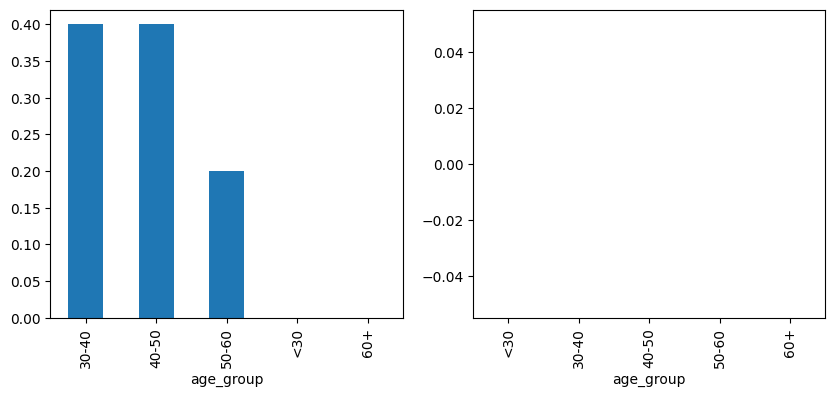

In [107]:
#plot the bar graph of job categories with response_flag mean value.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df1.groupby(['age_group'])["response_flag"].mean().plot.bar()
plt.show()

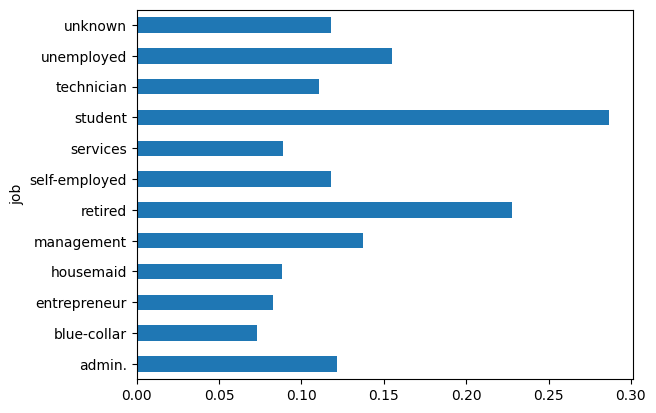

In [108]:
df1.groupby("job")["response_flag"].mean().plot.barh()
plt.show()

## 4.Multivariate analysis 

In [109]:
#create heat map of education vs marital vs response_flag
res=pd.pivot_table(data=df1,index="education",columns="marital",values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138298,0.075486,0.106682
secondary,0.103375,0.094626,0.129213
tertiary,0.138001,0.129724,0.183431
unknown,0.142012,0.122414,0.162879


<Axes: xlabel='marital', ylabel='education'>

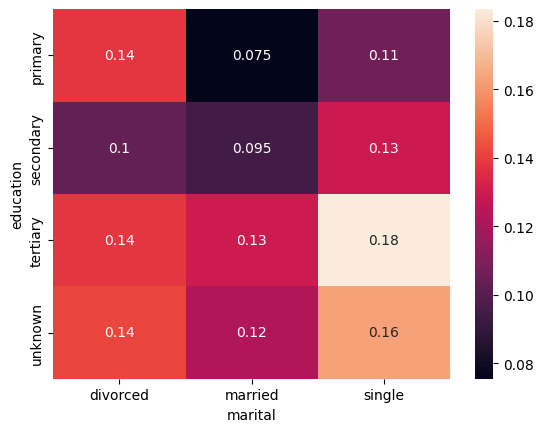

In [110]:
#create the heat map of Job vs marital vs response_flag.
sns.heatmap(res,annot=True)

<Axes: xlabel='marital', ylabel='education'>

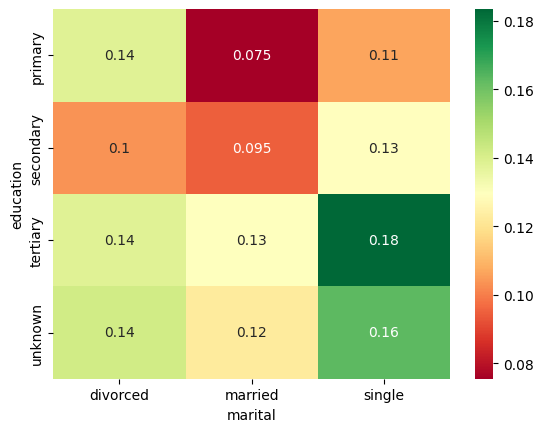

In [111]:
sns.heatmap(res,annot=True,cmap="RdYlGn")

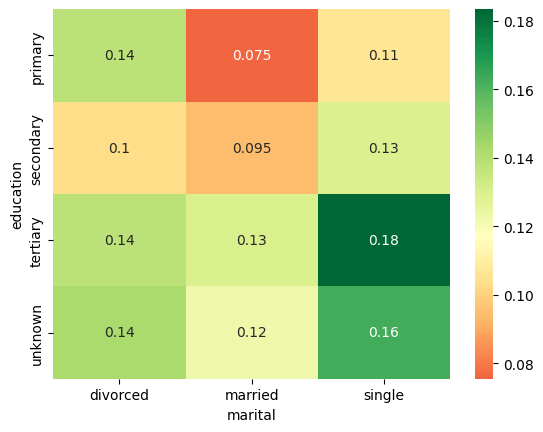

In [112]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

In [113]:
#create the heat map of education vs poutcome vs response_flag.
res=pd.pivot_table(data=df1,index="job",columns="poutcome",values="response_flag")
res

poutcome,failure,other,success,unknown
job,,,,
admin.,0.133748,0.165975,0.598039,0.093559
blue-collar,0.059925,0.087282,0.574324,0.064572
entrepreneur,0.091463,0.076923,0.409091,0.076070
housemaid,0.134021,0.153846,0.586207,0.068934
management,0.160920,0.223919,0.687339,0.102043
retired,0.221739,0.349398,0.718391,0.175014
self-employed,0.096970,0.213115,0.654545,0.093220
services,0.094595,0.101695,0.694118,0.072506
student,0.290598,0.283951,0.712644,0.229709


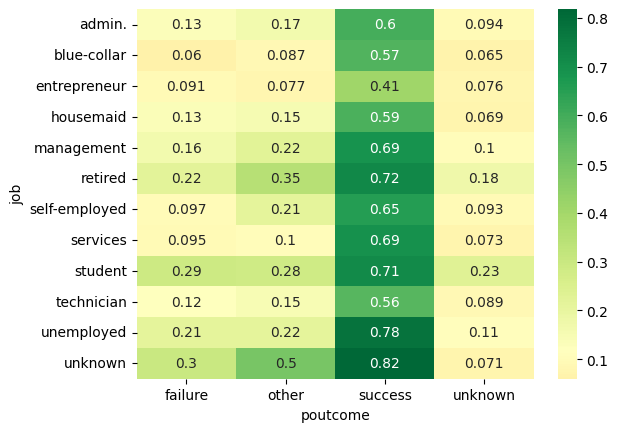

In [114]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

# Predictions

In [115]:
# Explore the data using descriptive statistics
print(df.describe())

                age         salary        balance           day      duration   
count  45211.000000   45211.000000   45211.000000  45211.000000  45211.000000  \
mean      40.930813   57006.171065    1362.272058     15.806419     83.275253   
std       10.619339   32085.718415    3044.765829      8.322476    184.625500   
min       18.000000       0.000000   -8019.000000      1.000000      0.000000   
25%       33.000000   20000.000000      72.000000      8.000000      2.233333   
50%       39.000000   60000.000000     448.000000     16.000000      5.000000   
75%       48.000000   70000.000000    1428.000000     21.000000     91.000000   
max       95.000000  120000.000000  102127.000000     31.000000   3881.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000 

In [116]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261.0,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151.0,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76.0,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92.0,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198.0,1,-1,0,unknown,no,unknown,unknown


In [117]:
# split into features and target
X = df.drop('response', axis=1)
y = df['response']

In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [119]:
# encode categorical variables
cat_cols = ['marital', 'job','education', 'targeted', 'default', 'housing', 'loan', 'contact']
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [120]:
num_cols = ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [121]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols)
])

In [122]:
X_preprocessed = preprocessor.fit_transform(X_encoded)

In [123]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

## Predicting using LogisticRegression

In [124]:
lr_model = LogisticRegression()

In [125]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [128]:
y_pred = lr_model.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [129]:
from sklearn.metrics import precision_score, recall_score

# assuming y_true and y_pred are your target variable and predicted values, respectively
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')

In [130]:
print('Logistic Regression Model Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(set(y_test)) # check the unique values in target variable
print('Precision:', precision_score(y_test, y_pred, pos_label='yes')) # specify 'yes' as the pos_label parameter
print('Recall:', recall_score(y_test, y_pred,pos_label='yes'))
print('F1-score:', f1_score(y_test, y_pred,pos_label='yes'))

Logistic Regression Model Metrics:
Accuracy: 0.8782483689041247
{'yes', 'no'}
Precision: 0.1875
Recall: 0.002749770852428964
F1-score: 0.0054200542005420045


In [131]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_pred = le.fit_transform(y_pred)
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

AUC-ROC: 0.500557480999655


## Predicting using RandomForestClassifier

In [132]:
rf_model = RandomForestClassifier()

In [133]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [134]:
y_pred = rf_model.predict(X_test)

In [135]:
print('Random Forest Model Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred,pos_label='yes'))
print('Recall:', recall_score(y_test, y_pred,pos_label='yes'))
print('F1-score:', f1_score(y_test, y_pred,pos_label='yes'))

Random Forest Model Metrics:
Accuracy: 0.893177043016698
Precision: 0.6213592233009708
Recall: 0.2933088909257562
F1-score: 0.398505603985056


In [141]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_pred = le.fit_transform(y_pred)
ana= roc_auc_score(y_test, y_pred)
print('AUC-ROC:', ana)

AUC-ROC: 0.6343933790644877
